In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
!pwd

/Users/juliusgruber/Desktop/IMC-Prosperity-2/Round5


In [36]:
df1 = pd.read_csv('data/trades_round_1_day_-1_wn.csv', delimiter=";")
df2 = pd.read_csv('data/trades_round_1_day_0_wn.csv', delimiter=";")
df3 = pd.read_csv('data/trades_round_1_day_-2_wn.csv', delimiter=";")

df4 = pd.read_csv('data/trades_round_3_day_0_wn.csv', delimiter=";")
df5 = pd.read_csv('data/trades_round_3_day_1_wn.csv', delimiter=";")
df6 = pd.read_csv('data/trades_round_3_day_2_wn.csv', delimiter=";")

df7 = pd.read_csv('data/trades_round_4_day_1_wn.csv', delimiter=";")
df8 = pd.read_csv('data/trades_round_4_day_2_wn.csv', delimiter=";")
df9 = pd.read_csv('data/trades_round_4_day_3_wn.csv', delimiter=";")

In [43]:
df1.head(10)

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Amelia,Valentina,STARFRUIT,SEASHELLS,5047.0,13
1,0,Remy,Valentina,STARFRUIT,SEASHELLS,5047.0,1
2,0,Remy,Vinnie,AMETHYSTS,SEASHELLS,10004.0,1
3,1100,Vinnie,Amelia,AMETHYSTS,SEASHELLS,9996.0,2
4,1700,Remy,Vladimir,AMETHYSTS,SEASHELLS,10002.0,1
5,1700,Ruby,Vladimir,STARFRUIT,SEASHELLS,5043.0,8
6,1800,Remy,Valentina,AMETHYSTS,SEASHELLS,10002.0,1
7,1900,Remy,Vladimir,STARFRUIT,SEASHELLS,5044.0,1
8,2000,Valentina,Remy,AMETHYSTS,SEASHELLS,9998.0,1
9,2400,Valentina,Remy,STARFRUIT,SEASHELLS,5038.0,1


In [47]:
import matplotlib.pyplot as plt

def calculate_and_plot_pnl(df):
    # Identify unique traders and symbols
    traders = set(df['buyer']).union(set(df['seller']))
    symbols = df['symbol'].unique()

    # Prepare a P&L DataFrame
    pnl_df = pd.DataFrame(columns=['timestamp', 'trader', 'symbol', 'P&L'])

    # Calculate P&L for each trader and symbol
    for trader in traders:
        for symbol in symbols:
            # Select buying and selling trades for the trader and symbol
            buys = df[(df['buyer'] == trader) & (df['symbol'] == symbol)]
            sells = df[(df['seller'] == trader) & (df['symbol'] == symbol)]
            
            # Calculate total cost (buy) and revenue (sell)
            total_cost = sum(buys['price'] * buys['quantity'])
            total_revenue = sum(sells['price'] * sells['quantity'])
            
            # Calculate P&L
            pnl = total_revenue - total_cost
            
            print(trader, symbol, pnl, sep=";")


# Calculate and plot the P&L
pnl_dataframe = calculate_and_plot_pnl(df1)
pnl_dataframe

    

TypeError: 'set_matplotlib_close' is an invalid keyword argument for print()

In [37]:
def is_increasing(arr1):
    for i in range(len(arr1)-1):
        if arr1[i] > arr1[i+1]:
            return False
    return True

In [41]:
is_increasing(df1["timestamp"])
is_increasing(df2["timestamp"])

True

In [42]:
for i in range(1,10):
    print(is_increasing(f'df{i}["timestamp"]'))

False
False
False
False
False
False
False
False
False


In [12]:
trades = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,Amelia,Valentina,STARFRUIT,SEASHELLS,5047.0,13
1,0,Remy,Valentina,STARFRUIT,SEASHELLS,5047.0,1
2,0,Remy,Vinnie,AMETHYSTS,SEASHELLS,10004.0,1
3,1100,Vinnie,Amelia,AMETHYSTS,SEASHELLS,9996.0,2
4,1700,Remy,Vladimir,AMETHYSTS,SEASHELLS,10002.0,1
...,...,...,...,...,...,...,...
1691,996200,Valentina,Vinnie,COCONUT_COUPON,SEASHELLS,585.0,14
1692,997100,Vinnie,Vinnie,COCONUT,SEASHELLS,9885.0,9
1693,997200,Vinnie,Vinnie,COCONUT,SEASHELLS,9883.0,8
1694,998600,Vinnie,Raj,COCONUT,SEASHELLS,9887.0,5


In [14]:
def plot_market_part(trade_df):
    buy = trade_df['buyer'].value_counts()
    sell = trade_df['seller'].value_counts()

    plt.figure(figsize=(10, 5))
    plt.title('Market trades value count by participants')
    plt.bar(buy.index, buy.values, label='Buyers',alpha = 0.5, color = 'red')
    plt.bar(sell.index, sell.values, label='Sellers',alpha = 0.5, color = 'blue')
    # attach the value labels to the bars
    for i in range(len(buy)):
        plt.text(buy.index[i], buy.values[i], buy.values[i], ha='center', va='bottom',color='red')
    for i in range(len(sell)):
        plt.text(sell.index[i], sell.values[i], sell.values[i], ha='center', va='bottom',color='blue')
    plt.show()

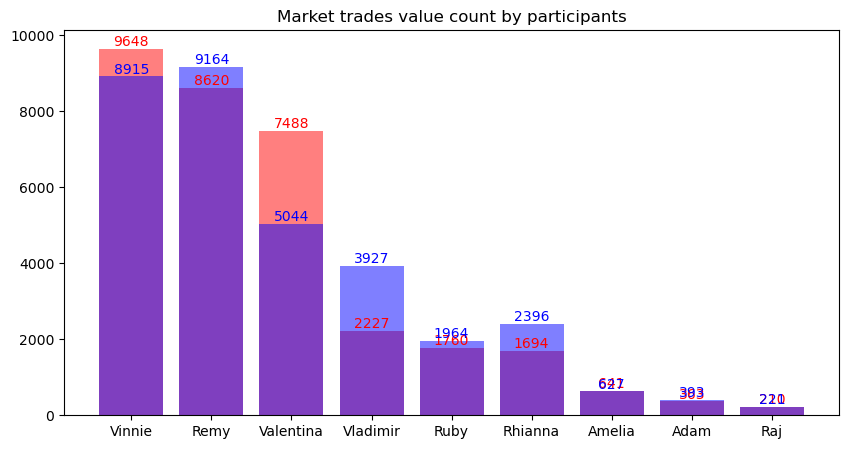

In [18]:
plot_market_part(trades)

In [19]:
def generate_pnl(trade_df,price_df,trader):
    temp = trade_df[(trade_df['buyer']==trader) | (trade_df['seller']==trader)]
    if len(temp['symbol'].unique()) == 0:
        print('No trades for '+trader)
        return

    else:
            
        fig, axs = plt.subplots(len(temp['symbol'].unique()),1,figsize=(10, 2*len(temp['symbol'].unique())))
        fig.suptitle('PnL for '+trader)
        
        for ticker in temp['symbol'].unique():
            
            ticker_pos = 0

            temp_ticker = temp[temp['symbol']==ticker]
            # initialize position
            temp_ticker['position_delta'] = temp_ticker['quantity']*(temp_ticker['buyer']==trader).astype(int)*2-1 # 1 for buy, -1 for sell
            temp_ticker['position'] = temp_ticker['position_delta'].cumsum()

            # we merge the price df to get the mid price for each trade
            temp_ticker = temp_ticker.merge(price_df[['product','timestamp','mid_price']],left_on=['symbol','timestamp'], right_on = ['product','timestamp'],how='left')

            temp_ticker['position'] = temp_ticker['position'].fillna(method='ffill')
            temp_ticker['balance'] = temp_ticker['position'] * temp_ticker['mid_price']
            temp_ticker['balance'] = temp_ticker['balance']+(temp_ticker['price']-temp_ticker['mid_price'])*temp_ticker['position_delta']
            # if we add long witha price higher than the mid price, we are losing money
            
            ax = axs[temp['symbol'].unique().tolist().index(ticker)] if len(temp['symbol'].unique())>1 else axs
            ax.plot(temp_ticker['timestamp'],temp_ticker['balance'])
            ax.set_title(ticker)
        plt.show()
        return 


def generate_pnl_for_each_product(trade_df,price_df):

    product_count = len(trade_df['symbol'].unique())
    fig, axs = plt.subplots(product_count,1,figsize=(10, 2*product_count))
    fig.suptitle('PnL for each product')

    for product in price_df['product'].unique():
        ax = axs[price_df['product'].unique().tolist().index(product)-1]
        ax.set_title(product)

        temp = trade_df[trade_df['symbol']==product]

        temp_trader_ls = temp['buyer'].unique().tolist()+temp['seller'].unique().tolist()
        temp_trader_ls = list(set(temp_trader_ls))


        for trader in temp_trader_ls:
            
            ticker_pos = 0
            temp_ticker = temp[(temp['buyer']==trader) | (temp['seller']==trader)]

            temp_ticker['position_delta'] = temp_ticker['quantity']*(temp_ticker['buyer']==trader).astype(int)*2-1 # 1 for buy, -1 for sell
            temp_ticker['position'] = temp_ticker['position_delta'].cumsum()

            # we merge the price df to get the mid price for each trade
            temp_ticker = temp_ticker.merge(price_df[['product','timestamp','mid_price']],left_on=['symbol','timestamp'], right_on = ['product','timestamp'],how='left')
            temp_ticker['position'] = temp_ticker['position'].fillna(method='ffill')
            temp_ticker['balance'] = temp_ticker['position'] * temp_ticker['mid_price']
            temp_ticker['balance'] = temp_ticker['balance']+(temp_ticker['price']-temp_ticker['mid_price'])*temp_ticker['position_delta']
            # if we add long witha price higher than the mid price, we are losing money
            ax.plot(temp_ticker['timestamp'],temp_ticker['balance'],label=trader)
            ax.legend()
    plt.show()
